In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 - Load dataset

In [36]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,PatientID,Age,Gender,BMI,BloodPressure,Condition,RiskScore,HighRisk
0,1,56,Female,20.9,94,Hypertension,10.3,0
1,2,69,Female,39.3,101,Hypertension,15.5,1
2,3,46,Male,33.7,135,Heart Disease,13.2,1
3,4,32,Female,18.9,123,Diabetes,7.6,0
4,5,60,Male,26.8,138,Hypertension,13.1,1


## Step 2- Basic data exploration

In [37]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      300 non-null    int64  
 1   Age            300 non-null    int64  
 2   Gender         300 non-null    object 
 3   BMI            300 non-null    float64
 4   BloodPressure  300 non-null    int64  
 5   Condition      238 non-null    object 
 6   RiskScore      300 non-null    float64
 7   HighRisk       300 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 18.9+ KB


PatientID         0
Age               0
Gender            0
BMI               0
BloodPressure     0
Condition        62
RiskScore         0
HighRisk          0
dtype: int64

## Step 3- Data cleaning if needed

In [38]:
df = df.drop_duplicates()

## Create useful columns

In [45]:
#Make a column for age group

bins = [0,30,45,60,100]
labels = ["Young","Middle","Senior","Elderly"]
df['AgeGroup'] = pd.cut(df["Age"], bins = bins, labels = labels)

#make a column for risk level
df["RiskLevel"] = np.where(df["HighRisk"] == 1, "High", "Low")


## Step 4-Perform exploratory analysis

In [55]:
#Total Patients
total = len(df)

#Average age
avg_age = df["Age"].mean()

#Average risk score
avg_riskScore = np.mean(df["RiskScore"])



## Step 5-Create visualization in python

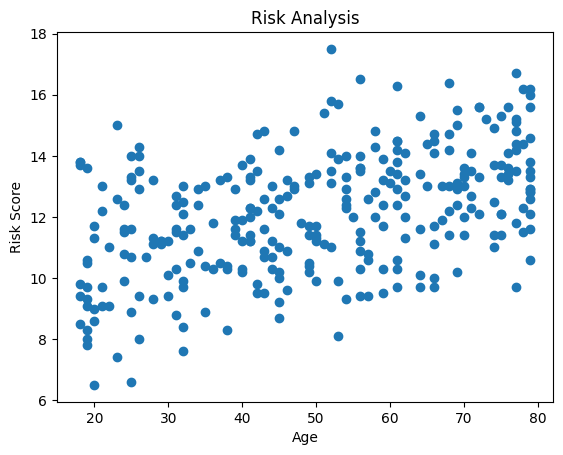

In [58]:
#Risk vs Age
plt.scatter(df["Age"], df["RiskScore"])
plt.xlabel("Age")
plt.ylabel("Risk Score")
plt.title("Risk Analysis")
plt.show()

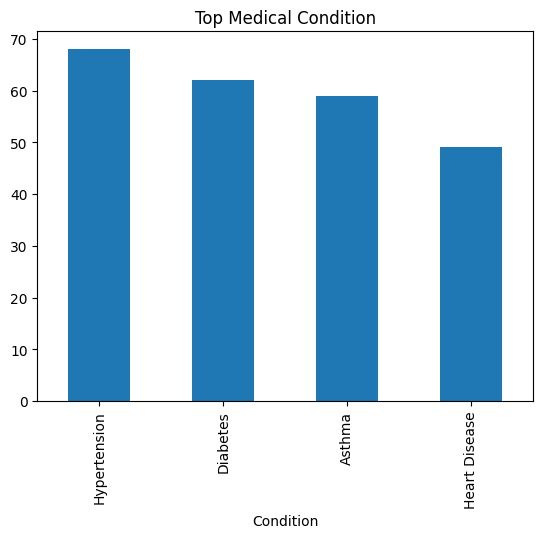

In [63]:
df["Condition"].value_counts().plot(kind = "bar")
plt.title("Top Medical Condition")
plt.show()

## step 6-Export cleaned data for power bi

In [65]:
df.to_csv("cleaned_healtgcare_data.csv",index = False)